In [3]:
import pandas as pd
import numpy as np
import pickle
import collections
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [4]:
nations = ['US', 'CA', 'GB']
country = pd.DataFrame()
for nation in nations:
    df = pd.DataFrame()
    filename = f'//Users/mahimakaushiva/Desktop/Youtube/Youtube/countries/{nation}videos.csv'
    df = pd.read_csv(filename)
    videos = collections.Counter(df['title'])
#     total = len(videos)
    codes = nation
    df['trending_days'] = df['title'].map(videos)
    df = df.drop_duplicates(subset='title', keep='last')
    df['region'] = codes
    country = country.append(df)
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region
10,9wRQljFNDW8,17.14.11,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13T02:05:26.000Z,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US
36,Om_zGhJLZ5U,17.14.11,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12T18:00:03.000Z,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US
41,goP4Z5wyOlM,17.14.11,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12T21:16:40.000Z,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US
44,STI2fI7sKMo,17.14.11,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11T15:00:03.000Z,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US
46,ogYum4kWXgk,17.14.11,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13T13:00:06.000Z,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US


In [5]:
# converting trending_date and publish_time to datetime

country['trending_date'] = pd.to_datetime(country['trending_date'],errors='coerce', format='%y.%d.%m')
country['publish_time'] = pd.to_datetime(country['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

country = country[country['trending_date'].notnull()]
country = country[country['publish_time'].notnull()]

country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US
44,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US
46,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13 13:00:06,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US


In [6]:
# removing incomplete rows

country = country.dropna(how = 'any', inplace = False, axis = 0)

In [7]:
country.shape

(33282, 18)

In [8]:
category =collections.Counter({2 : 'Autos & Vehicles', 
 1 : 'Film & Animation',
10 : 'Music',
15 : 'Pets & Animals',
17 : 'Sports',
18 : 'Short Movies',
19 : 'Travel & Events',
20 : 'Gaming',
21 : 'Videoblogging',
22 : 'People & Blogs',
23 : 'Comedy',
24 : 'Entertainment',
25 : 'News & Politics',
26 : 'Howto & Style',
27 : 'Education',
28 : 'Science & Technology',
29 : 'Nonprofits & Activism',
30 : 'Movies',
31 : 'Anime/Animation',
32 : 'Action/Adventure',
33 : 'Classics',
34 : 'Comedy',
35 : 'Documentary',
36 : 'Drama',
37 : 'Family',
38 : 'Foreign',
39 : 'Horror',
40 : 'Sci-Fi/Fantasy',
41 : 'Thriller',
42 : 'Shorts',
43 : 'Shows',
44 : 'Trailers'})
category

Counter({2: 'Autos & Vehicles',
         1: 'Film & Animation',
         10: 'Music',
         15: 'Pets & Animals',
         17: 'Sports',
         18: 'Short Movies',
         19: 'Travel & Events',
         20: 'Gaming',
         21: 'Videoblogging',
         22: 'People & Blogs',
         23: 'Comedy',
         24: 'Entertainment',
         25: 'News & Politics',
         26: 'Howto & Style',
         27: 'Education',
         28: 'Science & Technology',
         29: 'Nonprofits & Activism',
         30: 'Movies',
         31: 'Anime/Animation',
         32: 'Action/Adventure',
         33: 'Classics',
         34: 'Comedy',
         35: 'Documentary',
         36: 'Drama',
         37: 'Family',
         38: 'Foreign',
         39: 'Horror',
         40: 'Sci-Fi/Fantasy',
         41: 'Thriller',
         42: 'Shorts',
         43: 'Shows',
         44: 'Trailers'})

In [9]:
country['category']=country['category_id'].map(category)
# country = country.drop(columns = ['category_id'], axis = 1)
country.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_days,region,category
10,9wRQljFNDW8,2017-11-14,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655,25,177,https://i.ytimg.com/vi/9wRQljFNDW8/default.jpg,False,False,False,New England Patriots returner Dion Lewis blast...,1,US,Sports
36,Om_zGhJLZ5U,2017-11-14,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515,792,2111,https://i.ytimg.com/vi/Om_zGhJLZ5U/default.jpg,False,False,False,With Justice League approaching fast we rewatc...,1,US,Film & Animation
41,goP4Z5wyOlM,2017-11-14,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308,26,413,https://i.ytimg.com/vi/goP4Z5wyOlM/default.jpg,False,False,False,A strong 7.2-magnitude earthquake has rattled ...,1,US,News & Politics
44,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,22,2017-11-11 15:00:03,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,1,US,People & Blogs
46,ogYum4kWXgk,2017-11-14,People are Awesome & The Pet Collective presen...,People are Awesome,24,2017-11-13 13:00:06,"people are awesome|""people are awesome 2017""|""...",69844,3417,33,160,https://i.ytimg.com/vi/ogYum4kWXgk/default.jpg,False,False,False,Pets are Awesome! This is for all the animal l...,1,US,Entertainment


In [44]:
# dropping the movies category as it is too small

movies = country[country.category == 'Movies']
print(movies)

      channel_title                                              title  \
39073   Rhythm Boyz  Golak Bugni Bank Te Batua Full Movie (HD) | Ha...   

                                                    tags  \
39073  full movie|"full punjabi movie"|"golak"|"bugni...   

                                             description  category_id  \
39073  Rhythm Boyz Entertainment & Hayre Omjee Studio...           30   

      category region  trending_days  likes  dislikes    views  
39073   Movies     CA              6  67232      3784  5661965  


In [45]:
# dropping rows
country = country.drop([39073], axis=0)
country.head()

,channel_title,title,tags,description,category_id,category,region,trending_days,likes,dislikes,views
10,NFL,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",New England Patriots returner Dion Lewis blast...,17,Sports,US,1,655,25,81377
36,Screen Junkies,TL;DW - Every DCEU Movie Before Justice League,"screenjunkies|""screen junkies""|""sj news""|""hone...",With Justice League approaching fast we rewatc...,1,Film & Animation,US,1,7515,792,288922
41,BBC News,Iraq-Iran earthquake: Deadly tremor hits borde...,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",A strong 7.2-magnitude earthquake has rattled ...,25,News & Politics,US,1,308,26,34785
44,Shawn Johnson East,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...","shawn johnson|""andrew east""|""shawn east""|""shaw...",Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs,US,1,4451,1772,321053
46,People are Awesome,People are Awesome & The Pet Collective presen...,"people are awesome|""people are awesome 2017""|""...",Pets are Awesome! This is for all the animal l...,24,Entertainment,US,1,3417,33,69844


In [46]:
# building our df for text preprocessing

country = country[['channel_title', 'title', 'tags', 'description', 'category_id', 'category', 'region','trending_days', 'likes', 'dislikes', 'views']]
country.head()

,channel_title,title,tags,description,category_id,category,region,trending_days,likes,dislikes,views
10,NFL,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",New England Patriots returner Dion Lewis blast...,17,Sports,US,1,655,25,81377
36,Screen Junkies,TL;DW - Every DCEU Movie Before Justice League,"screenjunkies|""screen junkies""|""sj news""|""hone...",With Justice League approaching fast we rewatc...,1,Film & Animation,US,1,7515,792,288922
41,BBC News,Iraq-Iran earthquake: Deadly tremor hits borde...,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",A strong 7.2-magnitude earthquake has rattled ...,25,News & Politics,US,1,308,26,34785
44,Shawn Johnson East,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...","shawn johnson|""andrew east""|""shawn east""|""shaw...",Subscribe for weekly videos ▶ http://bit.ly/sj...,22,People & Blogs,US,1,4451,1772,321053
46,People are Awesome,People are Awesome & The Pet Collective presen...,"people are awesome|""people are awesome 2017""|""...",Pets are Awesome! This is for all the animal l...,24,Entertainment,US,1,3417,33,69844


In [47]:
set(country.category)

{'Autos & Vehicles',
 'Comedy',
 'Education',
 'Entertainment',
 'Film & Animation',
 'Gaming',
 'Howto & Style',
 'Music',
 'News & Politics',
 'Nonprofits & Activism',
 'People & Blogs',
 'Pets & Animals',
 'Science & Technology',
 'Shows',
 'Sports',
 'Travel & Events'}

In [48]:
country.category.value_counts()

Entertainment            10562
News & Politics           3349
Music                     3275
People & Blogs            3045
Comedy                    2687
Sports                    2492
Howto & Style             2066
Film & Animation          1637
Science & Technology      1062
Gaming                    1044
Education                  883
Pets & Animals             399
Autos & Vehicles           330
Travel & Events            268
Shows                      116
Nonprofits & Activism       66
Name: category, dtype: int64

In [ ]:
# 16 categories or classes

In [49]:
# splitting into train and test - title and category : 80:20

train_size = int(len(country) * 0.8)

train_title = country['title'][:train_size]
test_title = country['title'][train_size:]

train_category = country['category'][:train_size]
test_category = country['category'][:train_size]

num_labels = 16

In [118]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(country.category)
country.category = le.transform(country.category)
country.head(5)

,channel_title,title,tags,description,category_id,category,region,trending_days,likes,dislikes,views
10,NFL,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",New England Patriots returner Dion Lewis blast...,17,14,US,1,655,25,81377
36,Screen Junkies,TL;DW - Every DCEU Movie Before Justice League,"screenjunkies|""screen junkies""|""sj news""|""hone...",With Justice League approaching fast we rewatc...,1,4,US,1,7515,792,288922
41,BBC News,Iraq-Iran earthquake: Deadly tremor hits borde...,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",A strong 7.2-magnitude earthquake has rattled ...,25,8,US,1,308,26,34785
44,Shawn Johnson East,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...","shawn johnson|""andrew east""|""shawn east""|""shaw...",Subscribe for weekly videos ▶ http://bit.ly/sj...,22,10,US,1,4451,1772,321053
46,People are Awesome,People are Awesome & The Pet Collective presen...,"people are awesome|""people are awesome 2017""|""...",Pets are Awesome! This is for all the animal l...,24,3,US,1,3417,33,69844


In [119]:
# define tokenizer with vocab size

#Vectorization by converting each text into a sequence of integers or a vector
#We want results from the top 50000 words
#Set the maximum number of words in each title to 7

# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku


# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000

# Max number of words in each title
MAX_SEQUENCE_LENGTH = 7

EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_title)
X_train = tokenizer.texts_to_matrix(train_title)
X_test = tokenizer.texts_to_matrix(test_title)

encoder = LabelBinarizer()
encoder.fit(train_category)
y_train = encoder.transform(train_category)
y_test = encoder.transform(test_category)

# word_index = tokenizer.word_index
# print('Found %s unique tokens.' % len(word_index))

In [91]:
X_train.shape, Y_train.shape

((26624, 50000), (26624, 16))

In [92]:
# # truncate and pad the input sequence so they are all in the same length for modeling

# X = tokenizer.texts_to_sequences(country['title'].values)
# X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
# print('Shape of data tensor:', X.shape)

In [93]:
# # converting categorical labels to numbers

# Y = pd.get_dummies(country['category']).values
# print('Shape of label tensor:', Y.shape)

In [94]:
# # Train-test-split

# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
# print(X_train.shape,Y_train.shape)
# print(X_test.shape,Y_test.shape)

In [101]:
# let us build a basic model

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 7, 100)            5000000   
_________________________________________________________________
activation_12 (Activation)   (None, 7, 100)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 7, 100)            0         
_________________________________________________________________
dense_17 (Dense)             (None, 7, 512)            51712     
_________________________________________________________________
activation_13 (Activation)   (None, 7, 512)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 512)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 7, 16)           

In [105]:
# num_epochs = 10
# batch_size = 128
# history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=num_epochs,
#                     verbose=2, validation_split=0.2)

In [56]:
# first layer is the embedded layer that uses 100 length vectors to represent each word
# spatialdropout1d performs variational dropout
# the next layer is the LSTM layer with 100 memory units
# output layer must contain 16 output values, one for each class
# activation function is softmax for multi-class classification
# categorical_crossentropy is used as the loss function

from keras.layers.core import Dense, SpatialDropout1D
from keras.layers import Flatten
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(16, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 21299 samples, validate on 5325 samples
Epoch 1/5
21299/21299 [==============================] - 21s 980us/step - loss: 1.9577 - accuracy: 0.4060 - val_loss: 1.5053 - val_accuracy: 0.5613
Epoch 2/5
21299/21299 [==============================] - 20s 938us/step - loss: 1.1889 - accuracy: 0.6452 - val_loss: 1.2560 - val_accuracy: 0.6203
Epoch 3/5
21299/21299 [==============================] - 20s 949us/step - loss: 0.7323 - accuracy: 0.7834 - val_loss: 1.2436 - val_accuracy: 0.6441
Epoch 4/5
21299/21299 [==============================] - 20s 931us/step - loss: 0.4691 - accuracy: 0.8629 - val_loss: 1.3376 - val_accuracy: 0.6569
Epoch 5/5
21299/21299 [==============================] - 20s 942us/step - loss: 0.3236 - accuracy: 0.9046 - val_loss: 1.3891 - val_accuracy: 0.6488


In [57]:
#another approach using GRU model, takes longer time
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

tokenizer_obj = Tokenizer()

tokenizer_obj.fit_on_texts(train_title) 

# pad sequences
max_length = max([len(s.split()) for s in train_title])

# define vocabulary size
vocab_size = len(tokenizer_obj.word_index) + 1

X_train_tokens =  tokenizer_obj.texts_to_sequences(train_title)
X_test_tokens = tokenizer_obj.texts_to_sequences(test_title)


X_train_pad = pad_sequences(X_train_tokens, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_tokens, maxlen=max_length, padding='post')

encoder = LabelBinarizer()
encoder.fit(train_category)
y_train = encoder.transform(train_category)
y_test = encoder.transform(test_category)

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

EMBEDDING_DIM = 100

print('Build model...')

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(16, activation='softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print('Summary of the built model...')
print(model.summary())

Build model...
Summary of the built model...
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 7, 100)            5000000   
_________________________________________________________________
spatial_dropout1d_7 (Spatial (None, 7, 100)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_14 (Dense)             (None, 16)                1616      
Total params: 5,082,016
Trainable params: 5,082,016
Non-trainable params: 0
_________________________________________________________________
None


In [61]:
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 21299 samples, validate on 5325 samples
Epoch 1/5
21299/21299 [==============================] - 21s 972us/step - loss: 1.9714 - accuracy: 0.4032 - val_loss: 1.5259 - val_accuracy: 0.5422
Epoch 2/5
21299/21299 [==============================] - 20s 923us/step - loss: 1.1994 - accuracy: 0.6371 - val_loss: 1.2654 - val_accuracy: 0.6145
Epoch 3/5
21299/21299 [==============================] - 20s 941us/step - loss: 0.7232 - accuracy: 0.7862 - val_loss: 1.2389 - val_accuracy: 0.6415
Epoch 4/5
21299/21299 [==============================] - 20s 946us/step - loss: 0.4473 - accuracy: 0.8707 - val_loss: 1.3411 - val_accuracy: 0.6471
Epoch 5/5
21299/21299 [==============================] - 20s 948us/step - loss: 0.3021 - accuracy: 0.9121 - val_loss: 1.4298 - val_accuracy: 0.6466


In [117]:
# text_labels = encoder.classes_
# label_names = country.title

# for i in range(10):
#     prediction = model.predict(np.array([X_test[i]]))
#     predicted_label = text_labels[np.argmax(prediction[0])]
#     #print(test_files_names.iloc[i])
#     print('Actual label:' + test_category.iloc[i])
#     print("Predicted label: " + predicted_label)

# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     # print(cm)

#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=90)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")
#         plt.tight_layout()
#         plt.ylabel('True label')
#         plt.xlabel('Predicted label')


# Y_pred = model.predict(X_test);
# cnf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))

# # Plot normalized confusion matrix
# fig = plt.figure()
# fig.set_size_inches(14, 12, forward=True)
# #fig.align_labels()

# # fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
# plot_confusion_matrix(cnf_matrix, classes=np.asarray(label_names), normalize=True,
#                       title='Normalized confusion matrix')

# fig.savefig("txt_classification-smote" + str(num_epochs) + ".png", pad_inches=5.0)

In [64]:
prediction = model.predict(X_test)

In [66]:
predictions = np.argmax(prediction, axis = 1)
predictions

array([ 3, 10, 10, ...,  3,  8,  6])

In [67]:
Y_test_labels = np.argmax(Y_test, axis =1)

In [68]:
Y_test_labels

array([ 3, 10,  7, ...,  3,  8,  6])

In [69]:
Y_train_labels = np.argmax(Y_train, axis =1)
Y_train_labels

array([ 7,  8, 10, ...,  1, 11,  3])

In [71]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(Y_test_labels, predictions)
cohen_score

0.5830988956027162

In [72]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(Y_test_labels, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.47619048 0.53236246 0.44776119 0.68764045 0.70866142 0.53617021
 0.7        0.79809221 0.59060403 0.         0.44006849 0.81632653
 0.57068063 0.83333333 0.80443548 0.73913043]
recall: [0.3030303  0.5992714  0.33707865 0.73205742 0.56426332 0.55752212
 0.68372093 0.7807154  0.66869301 0.         0.41993464 0.53333333
 0.49771689 0.625      0.76878613 0.38636364]
fscore: [0.37037037 0.5638389  0.38461538 0.70915411 0.62827225 0.54663774
 0.69176471 0.78930818 0.62722737 0.         0.42976589 0.64516129
 0.53170732 0.71428571 0.7862069  0.50746269]
support: [  66  549  178 2090  319  226  430  643  658   13  612   75  219   16
  519   44]


/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
from sklearn.metrics import confusion_matrix
import numpy as np


cm = confusion_matrix(Y_test_labels, predictions)
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

print(recall)

print(precision)

[0.3030303  0.5992714  0.33707865 0.73205742 0.56426332 0.55752212
 0.68372093 0.7807154  0.66869301 0.         0.41993464 0.53333333
 0.49771689 0.625      0.76878613 0.38636364]
[0.47619048 0.53236246 0.44776119 0.68764045 0.70866142 0.53617021
 0.7        0.79809221 0.59060403        nan 0.44006849 0.81632653
 0.57068063 0.83333333 0.80443548 0.73913043]


/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [86]:
X_train.shape, Y_train.shape

((26624, 7), (26624, 16))

In [87]:
#Let us try some sampling technique to remove class imbalance
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
smote = SMOTE('minority')


X_sm, Y_sm = smote.fit_sample(X_train, Y_train)
print(X_sm.shape, Y_sm.shape)

(35043, 7) (35043, 16)


In [88]:
history = model.fit(X_sm, Y_sm, batch_size=batch_size, epochs=num_epochs,
                    verbose = 2, class_weight= class_weight, validation_split= 0.2)

Train on 28034 samples, validate on 7009 samples
Epoch 1/10
 - 42s - loss: 0.2124 - accuracy: 0.9383 - val_loss: 1.7265 - val_accuracy: 0.4503
Epoch 2/10
 - 16s - loss: 0.1239 - accuracy: 0.9622 - val_loss: 1.9597 - val_accuracy: 0.4466
Epoch 3/10
 - 16s - loss: 0.1031 - accuracy: 0.9673 - val_loss: 1.9352 - val_accuracy: 0.4928
Epoch 4/10
 - 16s - loss: 0.0914 - accuracy: 0.9718 - val_loss: 2.5214 - val_accuracy: 0.4120
Epoch 5/10
 - 17s - loss: 0.0707 - accuracy: 0.9783 - val_loss: 2.8285 - val_accuracy: 0.3942
Epoch 6/10
 - 17s - loss: 0.0654 - accuracy: 0.9792 - val_loss: 3.0479 - val_accuracy: 0.3864
Epoch 7/10
 - 16s - loss: 0.0592 - accuracy: 0.9813 - val_loss: 3.1944 - val_accuracy: 0.3781
Epoch 8/10
 - 17s - loss: 0.0518 - accuracy: 0.9832 - val_loss: 3.3637 - val_accuracy: 0.3674
Epoch 9/10
 - 18s - loss: 0.0486 - accuracy: 0.9851 - val_loss: 3.2476 - val_accuracy: 0.3856
Epoch 10/10
 - 17s - loss: 0.0476 - accuracy: 0.9847 - val_loss: 3.7102 - val_accuracy: 0.3511


In [89]:
score, acc = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=2)
print('test accuracy:', acc)

test accuracy: 0.6420309543609619


In [77]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight('balanced' ,np.unique(Y_train_labels) ,Y_train_labels)
num_epochs =10
batch_size = 128
history = model.fit(X_sm, Y_sm,
                    batch_size=batch_size,
                    epochs=num_epochs,
                    verbose=2,
                    class_weight=class_weight,
                    validation_split=0.2)

Train on 28034 samples, validate on 7009 samples
Epoch 1/10
 - 17s - loss: 0.6212 - accuracy: 0.8389 - val_loss: 2.3706 - val_accuracy: 0.1564
Epoch 2/10
 - 17s - loss: 0.3848 - accuracy: 0.8895 - val_loss: 2.4159 - val_accuracy: 0.2200
Epoch 3/10
 - 17s - loss: 0.2790 - accuracy: 0.9191 - val_loss: 2.5939 - val_accuracy: 0.2641
Epoch 4/10
 - 18s - loss: 0.2234 - accuracy: 0.9346 - val_loss: 2.8166 - val_accuracy: 0.2644
Epoch 5/10
 - 19s - loss: 0.1739 - accuracy: 0.9496 - val_loss: 2.9748 - val_accuracy: 0.2746
Epoch 6/10
 - 19s - loss: 0.1477 - accuracy: 0.9548 - val_loss: 3.4468 - val_accuracy: 0.2667
Epoch 7/10
 - 20s - loss: 0.1221 - accuracy: 0.9648 - val_loss: 3.6033 - val_accuracy: 0.2641
Epoch 8/10
 - 19s - loss: 0.1063 - accuracy: 0.9676 - val_loss: 3.7064 - val_accuracy: 0.2785
Epoch 9/10
 - 18s - loss: 0.0997 - accuracy: 0.9703 - val_loss: 4.2201 - val_accuracy: 0.2561
Epoch 10/10
 - 18s - loss: 0.1013 - accuracy: 0.9701 - val_loss: 4.4639 - val_accuracy: 0.2555


In [78]:
score, acc = model.evaluate(X_test, Y_test,
                       batch_size=batch_size, verbose=2)

print('Test accuracy:', acc)

Test accuracy: 0.6513444781303406


In [103]:
my_tags = ['Entertainment','News & Politics','People & Blogs','Comedy','Sports','Music','Howto & Style','Film & Animation',
           'Gaming','Science & Technology','Education','Autos & Vehicles','Pets & Animals','Travel & Events','Shows', 'Nonprofits & Activism']

In [ ]:
from sklearn.pipeline import Pipeline

In [106]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 100


data_for_lstms = country['title'].values

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(data_for_lstms)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

# Convert the data to padded sequences
X = tokenizer.texts_to_sequences(data_for_lstms)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

# One-hot Encode labels
Y = pd.get_dummies(country['category']).values
print('Shape of label tensor:', Y.shape)

# Splitting into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)

Found 35218 unique tokens.
Shape of data tensor: (33281, 50)
Shape of label tensor: (33281, 16)


In [109]:
# Define LSTM Model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(16, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 50, 100)           2000000   
_________________________________________________________________
spatial_dropout1d_9 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_20 (Dense)             (None, 16)                1616      
Total params: 2,082,016
Trainable params: 2,082,016
Non-trainable params: 0
_________________________________________________________________
None


In [110]:
# Training LSTM Model
epochs = 5
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1)

/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 22464 samples, validate on 2496 samples
Epoch 1/5
22464/22464 [==============================] - 33s 1ms/step - loss: 1.9143 - accuracy: 0.4212 - val_loss: 1.4571 - val_accuracy: 0.5673
Epoch 2/5
22464/22464 [==============================] - 29s 1ms/step - loss: 1.1611 - accuracy: 0.6458 - val_loss: 1.1955 - val_accuracy: 0.6334
Epoch 3/5
22464/22464 [==============================] - 28s 1ms/step - loss: 0.7636 - accuracy: 0.7699 - val_loss: 1.1573 - val_accuracy: 0.6558
Epoch 4/5
22464/22464 [==============================] - 30s 1ms/step - loss: 0.5376 - accuracy: 0.8399 - val_loss: 1.2184 - val_accuracy: 0.6691
Epoch 5/5
22464/22464 [==============================] - 29s 1ms/step - loss: 0.3876 - accuracy: 0.8851 - val_loss: 1.2891 - val_accuracy: 0.6735


In [111]:
score, acc = model.evaluate(X_test, Y_test, batch_size=batch_size, verbose=2)

print('Test accuracy:', acc)

Test accuracy: 0.6832111477851868


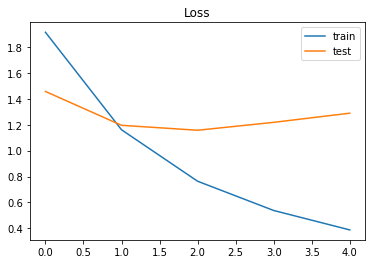

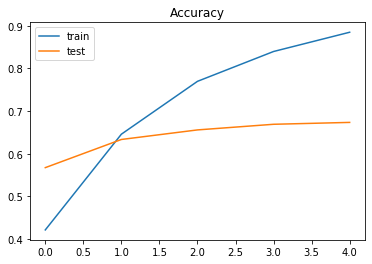

In [114]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

                       precision    recall  f1-score   support

     Autos & Vehicles       0.63      0.45      0.53        80
               Comedy       0.55      0.62      0.58       663
            Education       0.55      0.33      0.41       214
        Entertainment       0.73      0.75      0.74      2637
     Film & Animation       0.65      0.67      0.66       391
               Gaming       0.75      0.57      0.65       278
        Howto & Style       0.75      0.72      0.73       545
                Music       0.82      0.82      0.82       812
      News & Politics       0.65      0.72      0.69       825
Nonprofits & Activism       1.00      0.21      0.35        14
       People & Blogs       0.44      0.44      0.44       780
       Pets & Animals       0.83      0.60      0.70        88
 Science & Technology       0.57      0.52      0.54       268
                Shows       0.57      0.73      0.64        22
               Sports       0.84      0.80      0.82  

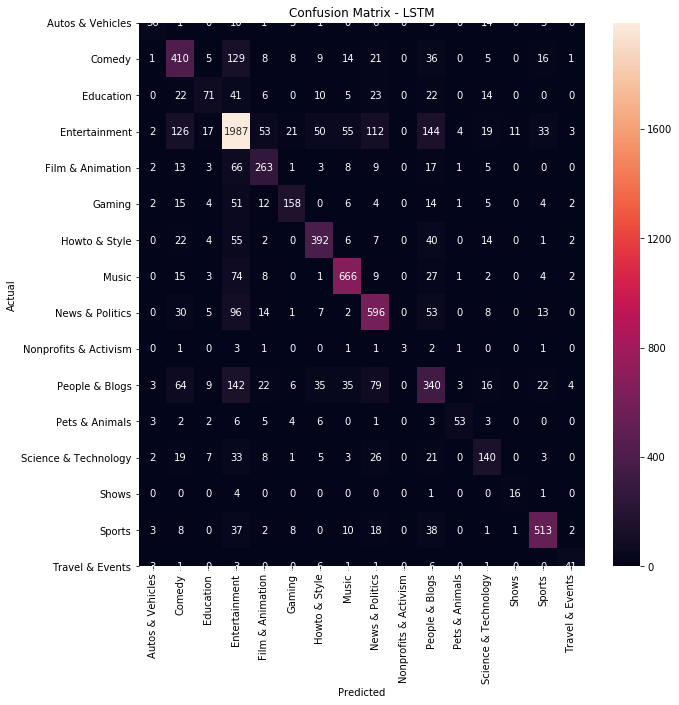

In [133]:
# performance evaluation

from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 42)
y_probas = model.predict(X_test)
y_pred = np.argmax(y_probas, axis=1)
y_test = np.argmax(Y_test, axis=1)

print(metrics.classification_report(y_test, y_pred, 
                                    target_names=list(le.classes_)))

conf_mat = confusion_matrix(y_test, y_pred, normalize=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=list(le.classes_), yticklabels=list(le.classes_))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - LSTM')
plt.show()

In [138]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, normalize=True)

ValueError: plot_confusion_matrix only supports classifiers

In [137]:
model

In [127]:
# from sklearn.metrics import average_precision_score
# average_precision = average_precision_score(y_test, y_probas)

# print('Average precision-recall score: {0:0.2f}'.format(
#       average_precision))

In [131]:
!pip install scikit-plot

/Users/mahimakaushiva/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


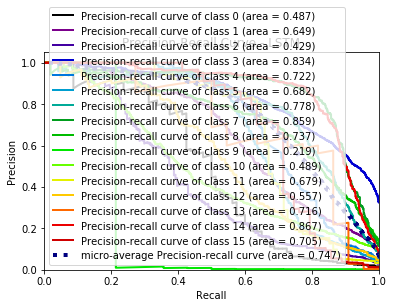

In [132]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_precision_recall_curve(y_test, y_probas)
plt.title('Precision-Recall Curve - LSTM')
plt.show()